## 0. An end-to-end Scikit-learn workflow

Note: This workflow assumes your data is ready to be used with machine learning models (is numerical, has no missing values)


In [1]:
# 1. get the data ready
import pandas as pd
import numpy as np
heart_disease=pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


1. x is a kind of feature matrix .

 age	sex	cp	trestbps	chol	fbs	restecg	thalach	exang	oldpeak	slope	ca	thal	 

2. y will the output column 
 
  target

In [2]:
# Create x (features matrix)
x = heart_disease.drop("target",axis=1)

# create y (labels)
y = heart_disease["target"]

### our problem is classification . we have to classify wheather someone have heart disease or not


In [3]:
# 2. choose the right model and hyperparameters
# RandomForestClassifier : classification ML model capable of learning patterns and data then classifying wheather a sample is one thing or the another thing
# clf is shoet form of classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# keep the default hyperparameters
# see what parameters the model is using 
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
# 3. fit the model to the training data
# split the data from x and y into x_train,y_train,x_test,y_test
from sklearn.model_selection import train_test_split
# 0.2 means 80% data will be used in training data and 20% will be used as test data 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
# View the data shapes
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((242, 13), (61, 13), (242,), (61,))

A model will (attempt to) learn the patterns in a dataset by calling the fit() function on it and passing it the data.

In [5]:
# fit the data
# its saying classification model i.e random forest find patterns in the training data
clf.fit(x_train, y_train);

In [6]:
x_train 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0
244,56,1,0,132,184,0,0,105,1,2.1,1,1,1
131,49,0,1,134,271,0,1,162,0,0.0,1,0,2
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [7]:
# make the predictions: we can only make predictions in the array that looks like the above dataframe (x_train)
     #y_label = clf.predict(np.array[0,2,3,4])

In [8]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
115,37,0,2,120,215,0,1,170,0,0.0,2,0,2
84,42,0,0,102,265,0,0,122,0,0.6,1,0,2
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
258,62,0,0,150,244,0,1,154,1,1.4,1,0,2
257,50,1,0,144,200,0,0,126,1,0.9,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,55,1,0,160,289,0,0,145,1,0.8,1,1,3
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3


Once a model has learned patterns in data, you can use them to make a prediction with the predict() function.

In [9]:
y_preds = clf.predict(x_test)
# This will be in the same format as y_test
y_preds

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [10]:
 #x_test.loc[206]

In [11]:
# Make a prediction on a single sample (has to be array)
 #clf.predict(np.array(x_test.loc[206]).reshape(1, -1))

In [12]:
y_test

115    1
84     1
228    0
258    0
257    0
      ..
232    0
198    0
250    0
37     1
238    0
Name: target, Length: 61, dtype: int64

In [13]:
# 4. evaluate the model on training data and test data: elaluate how good the predictions are or how well the ML model we've just trained our random forest classifier has done learning on the training data
clf.score(x_train, y_train)
# models have found pattern in the training data so well that it got 100% because it got trained on features as well as label it had chance to correct itself if it got something wrong. 

1.0

In [14]:
# model never seen the test data
clf.score(x_test, y_test)

0.8032786885245902

In [15]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test, y_preds))
# classificatin matrix that compares the test labels to the predictions 

              precision    recall  f1-score   support

           0       0.91      0.76      0.83        38
           1       0.69      0.87      0.77        23

    accuracy                           0.80        61
   macro avg       0.80      0.82      0.80        61
weighted avg       0.82      0.80      0.81        61



In [16]:
confusion_matrix(y_test ,y_preds)

array([[29,  9],
       [ 3, 20]], dtype=int64)

In [17]:
accuracy_score(y_test ,y_preds)

0.8032786885245902

## Experiment to improve (hyperparameter tuning)
A model's first evaluation metrics aren't always its last. One way to improve a models predictions is with hyperparameter tuning

Note: It's best practice to test different hyperparameters with a validation set or cross-validation..

In [18]:
# 5. Improve a model 
# Try different numbers of estimators (n_estimators is a hyperparameter you can change
np.random.seed(42)
for i in range (10,100,10):
    print(f"Trying model with {i} estimators..")
    clf = RandomForestClassifier(n_estimators = i).fit(x_train,y_train)
    # learn on training data and  evaluate  on test set
    print(f"Model accuracy on test set:{clf.score(x_test,y_test)*100:.2f}%")
    print("")

Trying model with 10 estimators..
Model accuracy on test set:80.33%

Trying model with 20 estimators..
Model accuracy on test set:80.33%

Trying model with 30 estimators..
Model accuracy on test set:75.41%

Trying model with 40 estimators..
Model accuracy on test set:80.33%

Trying model with 50 estimators..
Model accuracy on test set:85.25%

Trying model with 60 estimators..
Model accuracy on test set:81.97%

Trying model with 70 estimators..
Model accuracy on test set:80.33%

Trying model with 80 estimators..
Model accuracy on test set:77.05%

Trying model with 90 estimators..
Model accuracy on test set:80.33%



In [19]:
from sklearn.model_selection import cross_val_score

# With cross-validation
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {model.score(x_test, y_test) * 100}%")
    print(f"Cross-validation score: {np.mean(cross_val_score(model, x, y, cv=5)) * 100}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 80.32786885245902%
Cross-validation score: 78.53551912568305%

Trying model with 20 estimators...
Model accuracy on test set: 81.9672131147541%
Cross-validation score: 79.84699453551912%

Trying model with 30 estimators...
Model accuracy on test set: 78.68852459016394%
Cross-validation score: 80.50819672131148%

Trying model with 40 estimators...
Model accuracy on test set: 81.9672131147541%
Cross-validation score: 82.15300546448088%

Trying model with 50 estimators...
Model accuracy on test set: 78.68852459016394%
Cross-validation score: 81.1639344262295%

Trying model with 60 estimators...
Model accuracy on test set: 80.32786885245902%
Cross-validation score: 83.47540983606557%

Trying model with 70 estimators...
Model accuracy on test set: 78.68852459016394%
Cross-validation score: 81.83060109289617%

Trying model with 80 estimators...
Model accuracy on test set: 80.32786885245902%
Cross-validation score: 82.814207650273

In [20]:
# Another way to do it with GridSearchCV...
np.random.seed(42)
from sklearn.model_selection import GridSearchCV

# Define the parameters to search over
param_grid = {'n_estimators': [i for i in range(10, 100, 10)]}

# Setup the grid search
grid = GridSearchCV(RandomForestClassifier(),
                    param_grid,
                    cv=5)

# Fit the grid search to the data
grid.fit(x, y)

# Find the best parameters
grid.best_params_

{'n_estimators': 80}

In [21]:
# Set the model to be the best estimator
clf = grid.best_estimator_
clf

RandomForestClassifier(n_estimators=80)

In [22]:
# Fit the best model
clf = clf.fit(x_train, y_train)

In [23]:
# Find the best model scores
clf.score(x_test, y_test)

0.8032786885245902

##  Save a model for later use
A trained model can be exported and saved so it can be imported and used later. One way to save a model is using Python's pickle module.

In [24]:
import pickle

# Save an existing model to file
pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))
# Load a saved pickle model and evaluate it
loaded_pickle_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
print(f"Loaded pickle model prediction score: {loaded_pickle_model.score(x_test, y_test) * 100:.2f}%")


Loaded pickle model prediction score: 80.33%


For larger models, it may be more efficient to use [Joblib](https://joblib.readthedocs.io/en/stable/)

In [25]:
from joblib import dump, load

# Save a model using joblib
dump(model, "random_forest_model_1.joblib")
# Load a saved joblib model and evaluate it
loaded_joblib_model = load("random_forest_model_1.joblib")
print(f"Loaded joblib model prediction score: {loaded_joblib_model.score(x_test, y_test) * 100:.2f}%")

Loaded joblib model prediction score: 81.97%


## Warnings in jupyter notebook 

1. to read warning and do what its saying ugrade package
 
2. import warnings
 
   warnings.filterwarnings("ignore")


In [26]:
## checking the version of scikit-learn version
import sklearn
print(sklearn.__version__)


1.3.0


## 1. Getting our data ready to be used with Ml

Three main things we have to do :
   1. split the data into features usually x and y
   2. filling (also called imputing) or disregarding missing values
   3. converting non mumerical values to numerical values (also called feature enconding)

In [27]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
heart_disease.shape

(303, 14)

In [29]:
x = heart_disease.drop("target",axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [30]:
y=heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [31]:
# split data into training and teting
from sklearn.model_selection import train_test_split
x_train,x_tet,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [32]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [33]:
x.shape

(303, 13)

In [34]:
x.shape[0] *0.8

242.4

In [35]:
242+61

303

In [36]:
len(heart_disease)

303

### Make sure its all Numerical

In [37]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [38]:
car_sales["Doors"].value_counts()

Doors
4    856
5     79
3     65
Name: count, dtype: int64

In [39]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           1000 non-null   object
 1   Colour         1000 non-null   object
 2   Odometer (KM)  1000 non-null   int64 
 3   Doors          1000 non-null   int64 
 4   Price          1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [40]:
len(car_sales)

1000

In [41]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [42]:
# split the data into x and y
x = car_sales.drop("Price",axis=1)
y = car_sales["Price"]

# split the data into training and test data 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2)

In [43]:
# Build ML model
# Try to predict with random forest on price column (doesn't work)
                 # from sklearn.ensemble import RandomForestRegressor
     # ## ERROR
     #            model = RandomForestRegressor()
     #            model.fit(x_train, y_train)
     #            model.score(x_test, y_test)

In [44]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [45]:
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder    # to one hot code our features
from sklearn.compose import ColumnTransformer     # to get specific column of our dataframe to transform

categorical_features = ["Make","Colour","Doors"]  # defining categorical features we would like to transform 
one_hot = OneHotEncoder()                   # creating instance for OneHotEncoder
# accept a list of tuples

# firrst one hot is what we will call it and 2 is the actual that we want to use
# create instance of ColumnTransformer and feed it the transforms we'd like to make.
#Fit the instance of the `ColumnTransformer` to our data and transform it with the fit_transform(x)method
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                categorical_features)],
                                remainder = "passthrough")
transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [46]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [47]:
transformed_x[0]

array([0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 3.5431e+04])

In [48]:
# another way to convert categorical data into numerical
# without dtype it gives float value
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]],dtype=float)
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
995,4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
996,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
997,4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
998,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [49]:
# lets refit the model
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(transformed_x,y,test_size = 0.2)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=90)

In [50]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [51]:
model.score(x_test,y_test)

0.0

### 1.2 What if there were missing value ?

1. fill them with some value ( also knows as imputation).
2. remove the samples with missing data altogether.  

In [52]:
# import car sales missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [53]:
# how many missing values are there in each column
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [54]:
# create x and y
x = car_sales_missing.drop("Price",axis = 1)
y = car_sales_missing["Price"]

In [55]:
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder    # to one hot code our features
from sklearn.compose import ColumnTransformer     # to get specific column of our dataframe to transform

categorical_features = ["Make","Colour","Doors"]  # defining categorical features we would like to transform 
one_hot = OneHotEncoder()                   # creating instance for OneHotEncoder
# accept a list of tuples

# first one hot is what we will call it and 2 is the actual that we want to use
# create instance of ColumnTransformer and feed it the transforms we'd like to make.
#Fit the instance of the `ColumnTransformer` to our data and transform it with the fit_transform(x)method
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                categorical_features)],
                                remainder = "passthrough")
transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x
pd.DataFrame(transformed_x)

,0
0,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
1,"(0, 0)\t1.0\n (0, 6)\t1.0\n (0, 13)\t1.0\n..."
2,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
3,"(0, 3)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
4,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 11)\t1.0\n..."
...,...
995,"(0, 3)\t1.0\n (0, 5)\t1.0\n (0, 12)\t1.0\n..."
996,"(0, 4)\t1.0\n (0, 9)\t1.0\n (0, 11)\t1.0\n..."
997,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 12)\t1.0\n..."
998,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."


### if we get NaN error in above code try the below solutions

In [56]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


### Option 1: Fill missing data with Pandas

In [57]:
car_sales_missing["Doors"].value_counts()

Doors
4.0    811
5.0     75
3.0     64
Name: count, dtype: int64

In [58]:
## Fill the "Make" column with "missing" at missing values(empty spaces in the datframe)
car_sales_missing["Make"].fillna("missing",inplace =True)

# Fill the "colour "column" with missing at missing values(emplty spaces in the dataframe)
car_sales_missing["Colour"].fillna("missing",inplace =True)

# Fill the "odometer" column with the mean of the odometer column 
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace = True)

# Fill the doors column with 4 beacuse max cars in datframe have 4 doors
car_sales_missing["Doors"].fillna(4,inplace =True)

In [59]:
# check our datframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [60]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [61]:
# Remove rows with missing price value 
car_sales_missing.dropna(inplace = True)

In [62]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [63]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [64]:
# initially datframe has 1000 rows but after removing the  rows  where price value was missing we are left with 950 rows 
len(car_sales_missing)

950

In [65]:
x = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [66]:
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder    # to one hot code our features
from sklearn.compose import ColumnTransformer     # to get specific column of our dataframe to transform

categorical_features = ["Make","Colour","Doors"]  # defining categorical features we would like to transform 
one_hot = OneHotEncoder()                   # creating instance for OneHotEncoder
# accept a list of tuples

# first one hot is what we will call it and 2 is the actual that we want to use
# create instance of ColumnTransformer and feed it the transforms we'd like to make.
#Fit the instance of the `ColumnTransformer` to our data and transform it with the fit_transform(x)method
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                categorical_features)],
                                remainder = "passthrough")
transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [67]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


### Option 2: Fill missing values with scikit-learn

In [68]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [69]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [70]:
# Drop NaN value from dataset that is in the subset of price column
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace = True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [71]:
len(car_sales_missing)

950

In [72]:
# split into x and y
x = car_sales_missing.drop("Price",axis =1)
y = car_sales_missing["Price"]

In [73]:
x.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [74]:
# Fill missing values with Sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill Categorical values with 'missing' & numerical values with mean
# short of categorical we used cat
cat_imputer = SimpleImputer(strategy = "constant",fill_value="missing") 
door_imputer = SimpleImputer(strategy = "constant",fill_value=4)
num_imputer = SimpleImputer(strategy = "mean")

# define columns
cat_features = ["Make","Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer(something that fills the missing data)
imputer =ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer",num_imputer,num_features)
])

# transform the data
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [75]:
car_sales_filled = pd.DataFrame(filled_x,
                                columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled.head()
                                         

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [76]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [77]:
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder    # to one hot code our features
from sklearn.compose import ColumnTransformer     # to get specific column of our dataframe to transform

categorical_features = ["Make","Colour","Doors"]  # defining categorical features we would like to transform 
one_hot = OneHotEncoder()                   # creating instance for OneHotEncoder
# accept a list of tuples

# first one hot is what we will call it and 2 is the actual that we want to use
# create instance of ColumnTransformer and feed it the transforms we'd like to make.
#Fit the instance of the `ColumnTransformer` to our data and transform it with the fit_transform(x)method
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                categorical_features)],
                                remainder = "passthrough")
transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [78]:
# now we've got our data as numbers and filled (no missing value)
# let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(transformed_x,
                                                 y,
                                                 test_size=0.2)
model = RandomForestRegressor()
# RandomForestRegressor find patterns between x_trainand y_train
model.fit(x_train,y_train)
# evaluate patterns of train data set on test data set
model.score(x_test,y_test)

0.21990196728583944

In [79]:
len(car_sales_filled),len(car_sales)

(950, 1000)

## 2 . Choosing the right estimators/algorithm for your problem

Some things to note: 
* sklearn tefers yo ML models , algorithms as estimators.
     * * **Classification problem** - predicting a category (heart disease or not).
    * Sometimes you'll see `clf` (short for classifier) used as a classification estimator instance's variable name.
* **Regression problem** - predicting a number (selling price of a car).
* **Unsupervised problem (data with no labels)** - clustering (grouping unlabelled samples with other similar unlabelled samplesatively similar. 

### 2.1 Picking a ML model for a regression problem

 Get California Housing dataset-https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing

 

In [80]:
# get California Housing dataset
# importing data directly from sklearn datset module 
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [81]:
housing_df = pd.DataFrame(housing["data"],columns = housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [82]:
# housing_df["MedHouseVal"] = housing["target"]
# first run with this otherwise will give error in next code block
# housing_df["MedHouseVal"] = housing["target"]
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [83]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [84]:
# import algorithm /estimator
from sklearn.linear_model import Ridge

# set up random seed
np.random.seed(42)

#Create the data
x = housing_df.drop("target",axis = 1)
y = housing_df["target"]   # median house price in $100,000s

# split into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2)

#  Institate and fit the model (on the training set)
model = Ridge()
model.fit(x_train, y_train)

# check the score of the model(on the test set)
model.score(x_test,y_test)

0.5758549611440131

 we are trying to improve 0.5758549611440131 this
 what if ridge did't work  or our score didn't fit our needs?
 well we could always try a different model 
how about we try an ensemble model -ensemble is a combination of smaller model to try and make better prediction then just a single model 

In [85]:
# import random forest regressor from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# setup seed
np.random.seed(42)

# create the data 
x = housing_df.drop("target",axis=1)
y = housing_df["target"]

# split into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2)

# create random forest model
model = RandomForestRegressor()
model.fit(x_train, y_train)

# check the score of the model(on the test set)
model.score(x_test,y_test)

0.8065734772187598

## 2.2 Picking a ML model for a classification problem

In [86]:
heart_disease = pd.read_csv("Data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [87]:
len(heart_disease)

303

 Consulting the map and it says to try linear svc 

In [88]:
# import LinearSVC estimator class
from sklearn.svm import LinearSVC

# setup random seed
np.random.seed(42)

# Make the data
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# instantiate linearSVC
clf = LinearSVC(max_iter=10000)
clf.fit(x_train,y_train)

# evaluate the LinearSVC
clf.score(x_test, y_test)

C:\Users\parul\miniconda\sample_project_1\env\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\parul\miniconda\sample_project_1\env\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [89]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [90]:
# import random forest classifier estimator class
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# Make the data
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# instantiate RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

# evaluate the RandomForestClassifier
clf.score(x_test, y_test)

0.8524590163934426

Tidbit:
       1. if you have structured data, use ensemble methods
       2. if you have unstuctured data, use deep learning ort transfer learning
       

In [91]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


##  3. Fit the model/algorithm and use it to make predictions
Different names for:
* x = features,feature variable,data
* y = labels,targets,target variable

In [92]:
# import random forest classifier estimator class
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# Make the data
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# instantiate RandomForestClassifier
clf = RandomForestClassifier()
# fit the model to the data(training machine learning model)
clf.fit(x_train,y_train)

# evaluate the RandomForestClassifier (use the patterns the model has learned)
clf.score(x_test, y_test)

0.8524590163934426

In [93]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [94]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [95]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

### 3.2 Make predictions using a ML model 

  2 ways to make predictions 
1. predict ()
2. predict_proba ()

In [96]:
# use a trained model to make predictions
# this doesn't work
             # clf.predict(np.array([1,7,8,4,3]))

In [97]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [98]:
# predicted labels
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [99]:
# true labels 
np.array([y_test])

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [100]:
# compare predictions to truth labels to evaluate the model
y_preds = clf.predict(x_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [101]:
clf.score(x_test,y_test)

0.8524590163934426

In [102]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

Make predictions with 'predict_proba()' 

predict_proba() returns probabilities of a classification leabel

In [103]:
# predict_proba()
clf.predict_proba(x_test)

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53],
       [0.26, 0.74],
       [0.7 , 0.3 ],
       [0.11, 0.89],
       [0.95, 0.05],
       [0.03, 0.97],
       [0.02, 0.98],
       [0.01, 0.99],
       [0.84, 0.16],
       [0.95, 0.05],
       [0.98, 0.02],
       [0.51, 0.49],
       [0.89, 0.11],
       [0.38, 0.62],
       [0.29, 0.71],
       [0.26, 0.74],
       [0.34, 0.66],
       [0.2 , 0.8 ],
       [0.22, 0.78],
       [0.83, 0.17],
       [0.15, 0.85],
       [0.94, 0.06],
       [0.92, 0.08],
       [0.96, 0.04],
       [0.62, 0.38],
       [0.46, 0.54],
       [0.89, 0.11],
       [0.44, 0.56],
       [0.16, 0.84],
       [0.33, 0.67],
       [0.08, 0.92],
       [0.13, 0.87],
       [0.17, 0.83],
       [0.18, 0.82],
       [0.38, 0.62],
       [0.32, 0.68],
       [0.77, 0.23],
       [0.39, 0.61],
       [0.  ,

In [104]:
 clf.predict_proba(x_test[:5])
# it returns probability of that label being true
# [0, 1, 1, 0, 1]  = for 0 probability on left side is bigger and for 1 probability on right side is biiger
# when we add the 2 probability the maximum probability is 1

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [105]:
	# age	sex	cp	trestbps	chol	fbs	restecg	thalach	exang	oldpeak	slope	ca	thal
	# 57	1	  0	        150	    276	  0	       0	 112	   1	0.6	   1   1	 1
# the above sample has 0.89 probability of it being 0(not heart disease) for label and 0.11 for being 1(heart disease)

In [106]:
0.89+0.11 , 0.49+0.51 , 0.43+0.57 , 0.84+0.16 , 0.18+0.82

(1.0, 1.0, 1.0, 1.0, 1.0)

In [107]:
# lets predict() on the same data
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [108]:
x_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [109]:
heart_disease["target"].value_counts()
# 1 : for heart disease
# 2 : for not heart disease

target
1    165
0    138
Name: count, dtype: int64

##### Predict on regression model

In [110]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [111]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
# create the data
x = housing_df.drop("target",axis=1)
y = housing_df["target"]
# split into train and test set
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2)
# create model instance
madel = RandomForestRegressor()
# fit the model to data
model.fit(x_train,y_train)
# make predictions
y_preds = model.predict(x_test)

In [112]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [113]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [114]:
len(y_preds),len(y_test)

(4128, 4128)

In [115]:
#  average differnnce between predicted value and actual value:mean_absolute_error
#  compare the predictions to the truth 
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)
# 0.32659871732073664: on average each of our models predictions is 0.32 different to the actual test value

0.32659871732073664

In [116]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 4. Evaluating a ML Model

Three inbuilt ways to evaluate Scikit-learn models//estimators:

1. Estimator's built-in "score()" method
2. The scoring parameter
3. Problem-specifing metric functions

### 4.1 Evaluation a model with the score method

In [117]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
# create x and y
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# create classifier model instance 
# when we change no of estiamtors  accuracy for both train and test data changes
clf = RandomForestClassifier(n_estimators=10)
# Fit the model
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [118]:
# the highest value for .score method is 1.0 and the lowest is 0.0
clf.score(x_train,y_train)

1.0

In [119]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [120]:
clf.score(x_test,y_test)

0.8524590163934426

### lets use the score() on our regression problem

In [121]:
# import random forest regressor from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# setup seed
np.random.seed(42)

# create the data 
x = housing_df.drop("target",axis=1)
y = housing_df["target"]

# split into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2)

# create random forest model
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)

RandomForestRegressor()

In [122]:
model.score(x_test,y_test)
# default score() evaluation metric is R-squared for regression algorithms 
# highest =1.0 and lowest =0.0
# 0.8065734772187598:R-squared value

0.8065734772187598

In [123]:
housing_df.head()
# target variable(label) is dependent on other variables(feature variable)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [124]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [125]:
y_test.mean()

2.0550030959302323

### 4.2 Evaluating a model using the scoring parameter

In [126]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
# create x and y
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# create classifier model instance 
# when we change no of estiamtors  accuracy for both train and test data changes
clf = RandomForestClassifier(n_estimators=10)
# Fit the model
clf.fit(x_train,y_train);

In [127]:
clf.score(x_test,y_test)

0.8524590163934426

In [128]:
cross_val_score(clf,x,y,cv = 5)

array([0.80327869, 0.8852459 , 0.81967213, 0.75      , 0.71666667])

In [129]:
cross_val_score(clf,x,y,cv = 10)

array([0.83870968, 0.83870968, 0.80645161, 0.96666667, 0.83333333,
       0.76666667, 0.83333333, 0.83333333, 0.7       , 0.8       ])

In [130]:
np.random.seed(42)
# single training and test split score 
clf_single_score = clf.score(x_test,y_test)
# take the mean of 5-fold cross validation score
clf_cross_val_score=np.mean(cross_val_score(clf, x, y, cv=5))
# compare the two 
clf_single_score,clf_cross_val_score
#  even if accuracy is low prefer cross val score

(0.8524590163934426, 0.8150819672131148)

In [131]:
# scoring parameter set to none by default
# scoring parameter can be changed
cross_val_score(clf,x,y,cv=5,scoring=None)

array([0.80327869, 0.81967213, 0.85245902, 0.76666667, 0.75      ])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4.  Classification report

**Accuracy** 

In [132]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [133]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf,x,y,cv=5)

In [134]:
np.mean(cross_val_score)

0.8248087431693989

In [135]:
print(f"Heart Disease Classifier Cross-Validated Accuracy : {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy : 82.48%


 **Arear under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve : ROC curves are a comparision of a model's true positive rate(TRP) versus a models false   positive rate(FPR)

* True positive = model predicts 1 when true is 1.
* False Positive = model predicts 1 when true is 0.
* True Negative = model predicts 0 when true is 0.
* False Negative = model predicts 0 when true is 1.
 

In [136]:
#  creates x test.....etc
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [137]:
from sklearn.metrics import roc_curve 
# fit the classifier
clf.fit(x_train,y_train)
#  make predictions with probabilities
y_probs = clf.predict_proba(x_test)
y_probs[:10],len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [138]:
# [:,1] : column 1 of every row
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [139]:
#  calculate fpr,tpr and thresholds
fpr,tpr,thesholds = roc_curve(y_test,y_probs_positive)

#  check the false positive 
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

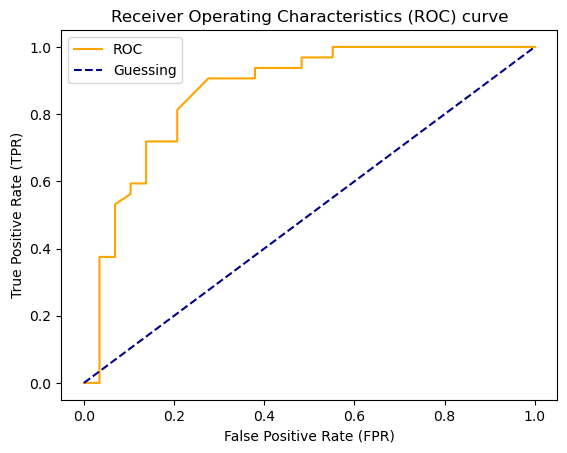

In [140]:
#  create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(frp,ptr):
    """
    plots a ROC curve given the false positive rate(FPR)
    and true positive rate (tpr) of a model.
    """
#  plot roc curve
plt.plot(fpr,tpr,color="orange",label="ROC")
#  plot line with no predictive power(baseline)
plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing") # when we comment this we get AUC

#  customize the plot
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristics (ROC) curve")
plt.legend()
plt.show()
plot_roc_curve(fpr,tpr)

In [141]:
from sklearn.metrics import roc_auc_score
roc_auc_score_value = roc_auc_score(y_test,y_probs_positive)
roc_auc_score_value

0.8669181034482759

from sklearn.metrics import RocCurveDisplay
roc_curve_display = RocCurveDisplay.from_estimator(estimator=clf, 
                                                   X=x_test, 
                                                   y=y_test)

In [142]:
# Plot perfect ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

#  not showing the perfect plot

In [143]:
# Perfect ROC AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused

In [144]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(x_test)
confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [145]:
# visualize confusion matrix with pd.crostab()
# rows are actual labels and columns are predicted labels
pd.crosstab(y_test,y_preds,rownames=["Actual Label"],colnames =["Predicted Labels"])
#  actual label is 0 and 22 predicted 0, 7 predicted 1
#  actual label is 1 and 8 predicted 0 while 24 predicted 1.

Predicted Labels,0,1
Actual Label,,
0,23,6
1,6,26


In [146]:
22+7+8+24

61

In [147]:
len(x_test)

61

**Seaborn is a visualization library that is built on the top of the matplotlib**

### how to install a conda package into the current environment from a jupyter notebook
     import sys
      !conda install --yes --prefix {sys.prefix} seaborn

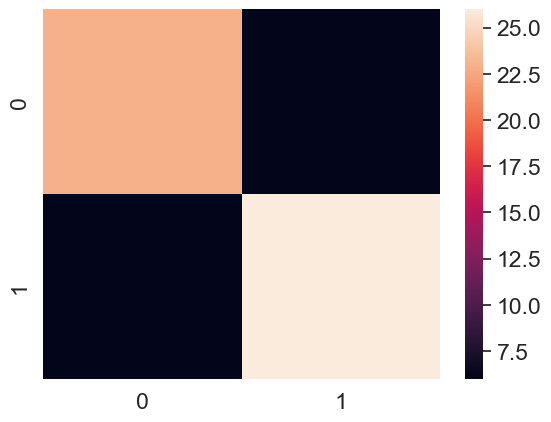

In [148]:
#  make our confusion matrix more visual with seaborn's heatmap
import seaborn as sns 
#  set the font scale
sns.set(font_scale=1.5)
# create confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)
# plot it using seaborn
sns.heatmap(conf_mat);

### Creating a confusion matrix using scikit-learn
to use the new methods of creating a confusion matrix  with sklearn you need sklearn version 1.0+

In [149]:
import sklearn
sklearn.__version__

'1.3.0'

In [150]:
clf

RandomForestClassifier()

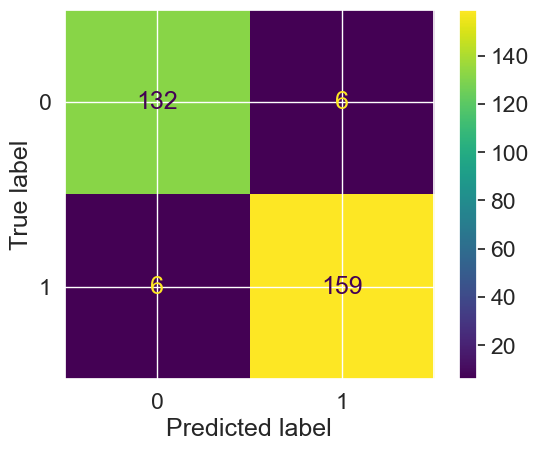

In [151]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=x,y=y)

In [152]:
y_preds

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0], dtype=int64)

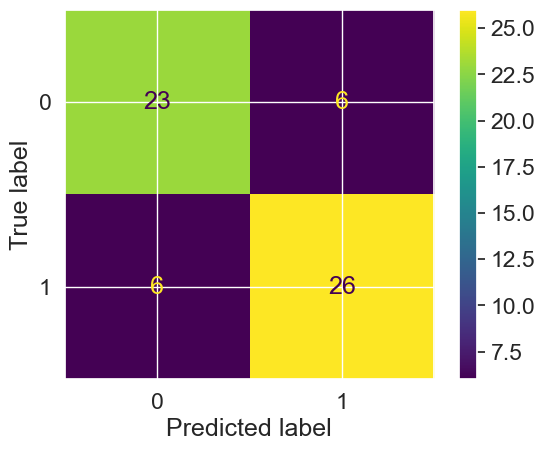

In [153]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_preds);

**Classification Report**

In [154]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [155]:
# Where precision and recall become valuable
# this is example where we want to use another metrics other than accuracy when you have large class imbalance
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # every prediction is 0

pd.DataFrame(classification_report(disease_true, 
                                   disease_preds, 
                                   output_dict=True,
                                   zero_division=0))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression Model Evaluation metrics

the ones we are going to cover are:
1. R^2(pronounced r-squared)or coefficient of determination
2. mean absolute error(MAE)
3. mean squared error(MSE)

**R^2**

In [156]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x= housing_df.drop("target",axis=1)
y=housing_df["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.2)
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [157]:
model.score(x_test,y_test)

0.8065734772187598

In [158]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [159]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [160]:
y_test.mean()

2.0550030959302323

In [161]:
from sklearn.metrics import r2_score
#  lets fill an array with y_test mean
# numpy create a full array of length y_test 
y_test_mean=np.full(len(y_test),y_test.mean())

In [162]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [163]:
r2_score(y_true=y_test,y_pred=y_test_mean)

0.0

In [164]:
r2_score(y_true=y_test,y_pred=y_test)

1.0

**Mean Absolute Error(MAE)**

MAE is the average of the absolute differences between predictions and actual values

It gives an idea of how wrong your model predictions are.

In [165]:
from sklearn.metrics import mean_absolute_error
y_preds= model.predict(x_test)
mae = mean_absolute_error(y_test,y_preds)  # here qbsolute get rid of negative sign
mae

0.32659871732073664

In [166]:
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [167]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [168]:
df = pd.DataFrame(data ={"actual values": y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [169]:
df["differences"].mean()

0.012048392126937589

In [170]:
#  mae using formulas and differences
np.abs(df["differences"]).mean()

0.32659871732073664

**Mean Squared Error(MSE)**

MSE is the mean of the square of the errors between actual and predicted values.



In [171]:
# MSE
from sklearn.metrics import mean_squared_error
y_preds = model.predict(x_test)
mse = mean_squared_error(y_test,y_preds)
mse

0.2534678520824551

In [172]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [173]:
#  calcuate MSE by hand
squared = np.square(df["differences"])
squared.mean()

0.2534678520824551

In [174]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differnces"] = 16

In [175]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [176]:
#  calculate MSE of large error
df_large_error["squared_differences"].mean()

0.2534678520824551

In [177]:
df_large_error.iloc[1:100] = 20
df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [178]:
#  calculate MSE of large error
df_large_error["squared_differences"].mean()

0.7295421709146245

**MSE also has RMSE which is root mean square error**

### 4.2.3 Finally using the scoring parameter

In [179]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
clf=RandomForestClassifier()

In [180]:
np.random.seed(42)
# cross-validation accuracy 
cv_acc = cross_val_score(clf,x,y,cv=5,scoring =None)
# if scoring =None ,estimator's scoring default evaluation metric is used(accuracy for classification models)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [181]:
# cross-validated accuracy 
print(f" the cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

 the cross-validated accuracy is: 82.48%


In [182]:
np.random.seed(42)
cv_acc = cross_val_score(clf,x,y,cv=5,scoring ="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [183]:
# cross-validated accuracy 
print(f" the cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

 the cross-validated accuracy is: 82.48%


In [184]:
#  precision 
cv_precision = cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_precision

array([0.76315789, 0.90322581, 0.83870968, 0.79411765, 0.74358974])

In [185]:
print(f" the cross-validated precision: {np.mean(cv_precision)*100:.2f}%")

 the cross-validated precision: 80.86%


In [186]:
#  Recall
cv_recall=cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_recall

array([0.87878788, 0.84848485, 0.78787879, 0.78787879, 0.90909091])

In [187]:
print(f" the cross-validated recall: {np.mean(cv_recall)*100:.2f}%")

 the cross-validated recall: 84.24%


**lets say for scoring parameter being used for regression problem**

In [188]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x=housing_df.drop("target",axis=1)
y=housing_df["target"]
model = RandomForestRegressor()

In [189]:
# model.score(...)
# Return the coefficient of determination of the prediction : default

In [190]:
np.random.seed(42)
cv_r2 = cross_val_score(model,x,y,cv=3,scoring=None) # scoring =none by default r2
np.mean(cv_r2)

0.6545458023124507

In [191]:
cv_r2

array([0.62156985, 0.72075819, 0.62130937])

In [192]:
#  mean squared error
cv_mse = cross_val_score(model,x,y,cv=5,scoring ="neg_mean_squared_error")
np.mean(cv_mse)

-0.4303784827892982

In [193]:
cv_mse

array([-0.52608501, -0.34777555, -0.37442498, -0.43875233, -0.46485455])

In [194]:
# mean absolute error
cv_mae = cross_val_score(model,x,y,cv=3,scoring ="neg_mean_absolute_error")
np.mean(cv_mae)

-0.48256026941860464

In [195]:
cv_mae

array([-0.51296541, -0.42562735, -0.50908805])

## 4.3 Using different evaluation metrics as Scikit-learn functions

 the 3rd way to evaluate scikit-learn machine learning models/estimators 

In [196]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)

# create x and y
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# split data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# create model
clf=RandomForestClassifier()

# fit model
clf.fit(x_train,y_train)

# maake predictions
y_preds = clf.predict(x_test)

# evaluate model using evaluation functions
print("Classifier metrics on the test set")
print(f"Accuracy:{accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds):.2f}")
print(f"Recall: {recall_score(y_test, y_preds):.2f}")
print(f"F1: {f1_score(y_test, y_preds):.2f}")

Classifier metrics on the test set
Accuracy:85.25%
Precision: 0.85
Recall: 0.88
F1: 0.86


In [197]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# create x and y
x= housing_df.drop("target",axis=1)
y= housing_df["target"]

# split data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# create a model
model=RandomForestRegressor()

# fit the model
model.fit(x_train,y_train)

# make predictions
y_preds = model.predict(x_test)

# evaluate model using evaluation functions
print("Regression metrics on th test set")
print(f"R2 score :{r2_score(y_test,y_preds)}")
print(f"MAE :{mean_absolute_error(y_test,y_preds)}")
print(f"MSE :{mean_squared_error(y_test,y_preds)}")

Regression metrics on th test set
R2 score :0.8065734772187598
MAE :0.32659871732073664
MSE :0.2534678520824551


## 5. Improving a model

First prediction  = baseline predictios.
First model = baseline model.

from a data prespective:
 * could we collect more data?  (generally the more data ,the better)
 * Could we improve our data ?

From a model prespective:
 * Is there a model we could use?
 * could we improve the current model?

**Patterns in the data that that machine learning model finds is also known as data parameters**
ML model will find parameters in data on its own whereas hyperparameters are settings on a model that we can adjust ,improve its ability to find patterns .

Three Ways to adjust hyperparameters:
1. By hand
2. randomly with RandomSearchCV
3. exhaustively with GridSearchCV

In [198]:
#  finding model parameters 
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [199]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

Lets make 3 sets : Training,Validation and Test

In [200]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}



We are going to try and adjust:

* max_depth
* max_featues
* min_samples_leaf
* min_samples_split
* n_estimators

In [201]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [204]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease)) # 15% of data
x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]
x_test, y_test = x[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Make baseline predictions
y_preds = clf.predict(x_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [205]:
len(x_train), len(x_valid), len(x_test)

(212, 45, 46)

In [206]:
np.random.seed(42)

# Create a second classifier
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(x_train, y_train)

# Make predictions
y_preds_2 = clf_2.predict(x_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 82.22%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


In [207]:
# clf_3 = RandomForestClassifier(n_estimators=100,
#                                 max_depth=10)

### 5.2 Hyperparameter tuning with RandomizesdSeachCV

In [214]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# Hyperparameter grid RandomizedSearchCV will search over
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into X & y
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Set n_jobs to -1 to use all cores (NOTE: n_jobs=-1 is broken as of 8 Dec 2019, using n_jobs=1 works)
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10, # try 10 models total
                            cv=5, # 5-fold cross-validation
                            verbose=2) # print out results

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(x_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

C:\Users\parul\miniconda\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\parul\miniconda\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parul\miniconda\sample_project_1\env\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\parul\miniconda\sample_project_1\env\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
   

In [215]:
rs_clf.best_params_

{'n_estimators': 10,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 5}

In [217]:
# make predictions with the best pyperparameters
rs_y_preds = rs_clf.predict(x_test)

# evaluate the predictions
rs_metrics = evaluate_preds(y_test,rs_y_preds)

Acc: 86.89%
Precision: 0.88
Recall: 0.88
F1 score: 0.88


### 5.3 Hyperparameter tuning with GridSearchCV

In [218]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [220]:
6*5*2*3*3*5

2700

In [221]:
# reduced search space of our hyperparameters
grid_2= {'n_estimators': [ 100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [227]:
(3*1*2*1*2)*5

60

In [228]:
from sklearn.model_selection import GridSearchCV, train_test_split

# Hyperparameter grid RandomizedSearchCV will search over
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into X & y
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# # Set n_jobs to -1 to use all cores (NOTE: n_jobs=-1 is broken as of 8 Dec 2019, using n_jobs=1 works)
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(x_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

C:\Users\parul\miniconda\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\parul\miniconda\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parul\miniconda\sample_project_1\env\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\parul\miniconda\sample_project_1\env\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
   

In [229]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100}

In [232]:
gs_y_preds = gs_clf.predict(x_test)

# evaluate the predictions 
gs_metrics = evaluate_preds(y_test,gs_y_preds)


Acc: 86.89%
Precision: 0.85
Recall: 0.91
F1 score: 0.88


lets comapare our different models metrics

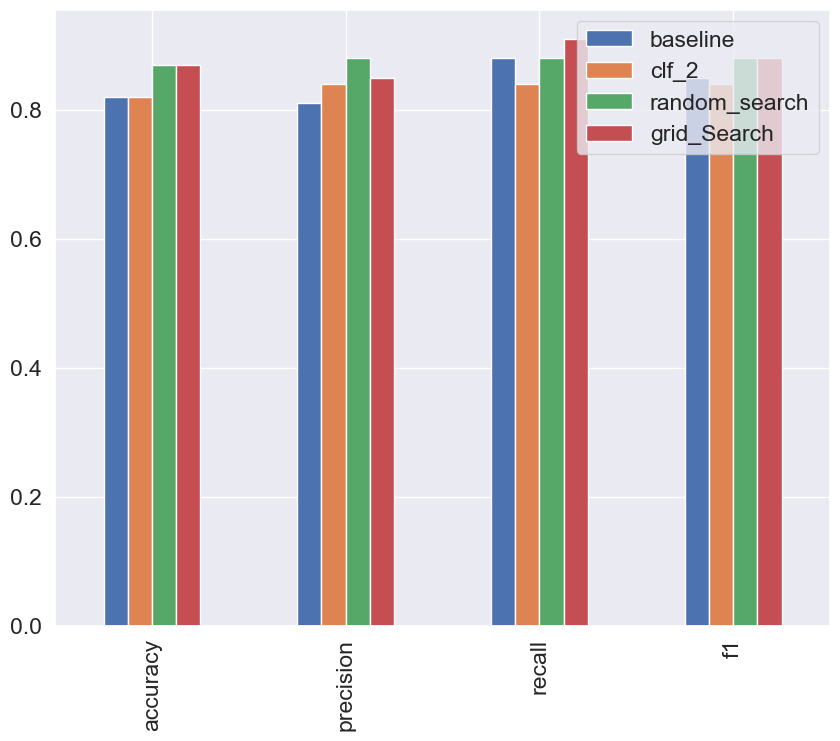

In [233]:
compare_metrics = pd.DataFrame({"baseline":baseline_metrics,
                               "clf_2":clf_2_metrics,
                               "random_search":rs_metrics,
                                "grid_Search":gs_metrics} )
compare_metrics.plot.bar(figsize=(10,8));

## 6. Saving and Loading ML Models

There are two ways to save and load machine learning models:
1. With python's pickle module
2. with the joblib module

**Pickle**

In [235]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf,open("gs_random__forest_model_1.pkl","wb"))

In [236]:
# load a saved model
loaded_pickle_model = pickle.load(open("gs_random__forest_model_1.pkl","rb"))

In [238]:
# make some predictions to see if it is actually saved
pickle_y_preds = loaded_pickle_model.predict(x_test)
evaluate_preds(y_test,pickle_y_preds)
# gives same results as the above grid search model

Acc: 86.89%
Precision: 0.85
Recall: 0.91
F1 score: 0.88


{'accuracy': 0.87, 'precision': 0.85, 'recall': 0.91, 'f1': 0.88}

**Joblib**

In [239]:
from joblib import dump, load

# Save a model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib") 

['gs_random_forest_model_1.joblib']

In [240]:
# Import a saved joblib model
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [241]:
# Make and evaluate joblib predictions 
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 86.89%
Precision: 0.85
Recall: 0.91
F1 score: 0.88


{'accuracy': 0.87, 'precision': 0.85, 'recall': 0.91, 'f1': 0.88}

## 7. Putting it all together

In [2]:
import pandas as pd
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [3]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [4]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

steps we want to do(all in one cell):
1 and 2 steps are preprocessing.

1. Fill the missing value
2. Convert data to numbers
3. Build a model on the data

In [7]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop the rows with missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipelines
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("num", numeric_transformer, numeric_features)])

# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Split data
x = data.drop("Price", axis=1)
y = data["Price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Fit and score the model
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.22188417408787875

In [10]:
# Using grid search with pipeline
from sklearn.model_selection import  GridSearchCV
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto", "sqrt"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(x_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samp

C:\Users\parul\miniconda\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\parul\miniconda\sample_project_1\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parul\miniconda\sample_project_1\env\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\parul\miniconda\sample_project_1\env\L

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['auto', 'sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [11]:
# Score the best model
gs_model.score(x_test, y_test)

0.2970584538514702